In [10]:
from fem.oned_deterministic import solve_system, L2_error
import matplotlib.pyplot as plt
from math import sin, pi
import numpy as np

## Define the problem

In [20]:
a, b, c = 1, 0, 0

def u(x):
    return sin(pi*x)

def f(x):
    return (pi**2)*sin(pi*x)

## Do FEM

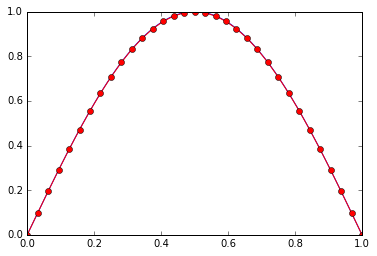

In [21]:
errors = []
XS = np.linspace(0, 1, 512)
US = [u(x) for x in XS]

for N in [4, 8, 16, 32, 64, 128, 256, 512]:
    # Solve the system 
    xs, U = solve_system(f, N, a, b, c)
    
    # Calculate the error
    errors.append((N, L2_error(u, U, N)))
    
    # Do a plot
    if N == 32:
        p = plt.plot(XS, US)
        p += plt.plot(xs, U, 'r-o')
        
p

In [22]:
errors

[(4, 0.03519913325464694),
 (8, 0.009016564691422566),
 (16, 0.0022673797959945952),
 (32, 0.0005676676187006475),
 (64, 0.00014196824780205),
 (128, 3.5495269750295416e-05),
 (256, 8.874017887172983e-06),
 (512, 2.2185169567767713e-06)]